In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import cm
my_fill = 8470

def pandas_index_localize(df):
    df.index = df.index.map(lambda x: pd.Timestamp(x).tz_localize('UTC'))
    return df

my_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/MD7003/FILLS/{my_fill}.parquet').sort_index())

In [316]:
assert len(my_df['HX:FILLN'].dropna()) == 1
assert my_df['HX:FILLN'].dropna().values[0] == my_fill

# Overview

This is a dense plot, please select only the info you want to show.

In [348]:
print('This is a dense plot, please select only the info you want to show.')
xlim_1 = pd.Timestamp('2022-11-23 15:30')
xlim_2 = pd.Timestamp('2022-11-23 19:00')

def base_plot(xlim_1=xlim_1, xlim_2=xlim_2):
    fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
    plt.plot(my_df['LHC.BCCM.B1.A:BEAM_ENERGY'].dropna(),'k')

    xfmt = md.DateFormatter('%H:%M')
    plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
    plt.xlabel('UTC time [HH:MM]')
    plt.ylabel('Beam Energy [GeV]')
    plt.xlim(xlim_1, xlim_2)
    plt.gca().xaxis.set_major_formatter(xfmt)


    # to plot beam modes spans
    if True: 
        aux = my_df['HX:BMODE'].dropna()
        cividis = cm.get_cmap('cividis', len(aux))
        cividis_r = cm.get_cmap('cividis_r', len(aux))
        for ii in range(len(aux)-1):
            ax.axvspan(aux.index[ii],aux.index[ii+1], color = cividis_r.colors[ii])
            ax.text((aux.index[ii+1]-aux.index[ii])/2+aux.index[ii], 5000, aux.iloc[ii],color='white', rotation= 90, ha='center', weight = 1000)
    return fig, ax 

fig, ax = base_plot()
# to plot beam intensities
if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Beam Intensity [1e13 p]')
    p, = ax2.plot(my_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna()/1e13,'b')
    ax2.plot(my_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY'].dropna()/1e13,'b:')
    ax2.yaxis.label.set_color(p.get_color())
    ax2.tick_params(axis='y', colors=p.get_color())

# to plot optics changes
if True: 
    optics_name_lists = my_df['BFC.LHC:OpticsActive:opticsName'].dropna().unique()
    viridis = cm.get_cmap('viridis', len(optics_name_lists))
    for my_index, ii in enumerate(optics_name_lists):
        aux = my_df[my_df['BFC.LHC:OpticsActive:opticsName']==ii]['BFC.LHC:OpticsActive:opticsName']
        plt.axvline(aux.index[0], label = aux.iloc[0],color = viridis.colors[my_index])
    plt.legend(loc='center left', bbox_to_anchor=(1.6, 0.5))

# to plot octupoles
if True: 
    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.set_ylabel('Octupoles [A]')
    p, = ax3.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'m')
    ax3.yaxis.label.set_color(p.get_color())
    ax3.tick_params(axis='y', colors=p.get_color())

if True: 
    ax4 = ax.twinx()
    ax4.spines.right.set_position(("axes", 1.2))
    ax4.set_ylabel('$\\beta^*$ in IP1/5 [cm]')
    p, = ax4.plot(my_df['HX:BETASTAR_IP1'].ffill(), color='c')
    ax4.yaxis.label.set_color(p.get_color())
    ax4.tick_params(axis='y', colors=p.get_color())
    ax4.set_ylim(50,150)

if True:
    ax5 = ax.twinx()
    ax5.spines.right.set_position(("axes", 1.3))
    ax5.set_ylabel('Q  correction [1E-3]')
    p, = ax5.plot(my_df['LhcStateTracker:LHCBEAM1:QH_TRIM:value'].dropna()*1000, color='g')
    ax5.plot(my_df['LhcStateTracker:LHCBEAM2:QH_TRIM:value'].dropna()*1000, 'g:')
    ax5.plot(my_df['LhcStateTracker:LHCBEAM1:QV_TRIM:value'].dropna()*1000, 'g--')
    ax5.plot(my_df['LhcStateTracker:LHCBEAM2:QV_TRIM:value'].dropna()*1000, 'g-.')

    ax5.yaxis.label.set_color(p.get_color())
    ax5.tick_params(axis='y', colors=p.get_color())
    #ax5.set_ylim(-10,10)

if True:
    ax6 = ax.twinx()
    ax6.spines.right.set_position(("axes", 1.4))
    ax6.set_ylabel('IP8 H/V crossing [urad]')
    p, = ax6.plot(my_df['LhcStateTracker:LHCBEAM:IP8-XING-H-MURAD:value'].dropna(), color='r')
    ax6.plot(my_df['LhcStateTracker:LHCBEAM:IP8-XING-V-MURAD:value'].dropna(), 'r:')

    ax6.yaxis.label.set_color(p.get_color())
    ax6.tick_params(axis='y', colors=p.get_color())
    #ax6.set_ylim(-10,10)

if True:
    ax7 = ax.twinx()
    ax7.spines.right.set_position(("axes", 1.5))
    ax7.set_ylabel('IP8 H/V offset [mm]')
    p, = ax7.plot(my_df['LhcStateTracker:LHCBEAM:IP8-SEP-H-MM:value'].dropna(), color='y')
    ax7.plot(my_df['LhcStateTracker:LHCBEAM:IP8-SEP-V-MM:value'].dropna(), 'y:')

    ax7.yaxis.label.set_color(p.get_color())
    ax7.tick_params(axis='y', colors=p.get_color())
    ax7.set_ylim(-0.1,0.1)


This is a dense plot, please select only the info you want to show.


# Luminosity

In [272]:
xlim_1 = pd.Timestamp('2022-11-23 16:30')
xlim_2 = pd.Timestamp('2022-11-23 19:00')
fig, ax = base_plot(xlim_1=xlim_1, xlim_2=xlim_2)
if True:
    ax1 = ax.twinx()
    ax1.spines.right.set_position(("axes", 1.1))
    ax1.set_ylabel('ATLAS:LUMI_TOT_INST')
    p, = ax1.plot(my_df['ATLAS:LUMI_TOT_INST'].dropna(), color='b')

    ax1.yaxis.label.set_color(p.get_color())
    ax1.tick_params(axis='y', colors=p.get_color())

if True:
    ax1 = ax.twinx()
    ax1.spines.right.set_position(("axes", 1.2))
    ax1.set_ylabel('CMS:LUMI_TOT_INST')
    p, = ax1.plot(my_df['CMS:LUMI_TOT_INST'].dropna(), color='r')

    ax1.yaxis.label.set_color(p.get_color())
    ax1.tick_params(axis='y', colors=p.get_color())

if True:
    ax1 = ax.twinx()
    ax1.spines.right.set_position(("axes", 1.3))
    ax1.set_ylabel('LHCB:LUMI_TOT_INST')
    p, = ax1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')

    ax1.yaxis.label.set_color(p.get_color())
    ax1.tick_params(axis='y', colors=p.get_color())

if True:
    ax1 = ax.twinx()
    ax1.spines.right.set_position(("axes", 1.4))
    ax1.set_ylabel('ALICE:LUMI_TOT_INST')
    p, = ax1.plot(my_df['ALICE:LUMI_TOT_INST'].dropna(), color='c')

    ax1.yaxis.label.set_color(p.get_color())
    ax1.tick_params(axis='y', colors=p.get_color())

# to plot octupoles
if True: 
    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.5))
    ax3.set_ylabel('Octupoles [A]')
    p, = ax3.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'y')
    ax3.yaxis.label.set_color(p.get_color())
    ax3.tick_params(axis='y', colors=p.get_color())


# Filling scheme

In [284]:
#https://github.com/PyCOMPLETE/FillingPatterns       
import fillingpatterns as fp 
my_fp = fp.FillingPattern.from_json('Utilities/25ns_156b_144_90_96_48bpi_4inj_MD7003_filling.json')
my_fp.compute_beam_beam_schedule(n_lr_per_side = [20,20,20,20]) # I am considering collision behind the D1, in particular to IP2/8
display(my_fp.b1.bb_schedule.head())
display(my_fp.b2.bb_schedule.head())

Computing collision schedules...
Done Beam 1
Done Beam 2


HO partner in ALICE  # of LR in ALICE BB partners in ALICE  \
12                  NaN                 0                   []   
13                  NaN                 0                   []   
14                  NaN                 0                   []   
15                  NaN                 0                   []   
16                  NaN                 0                   []   

   Positions in ALICE  HO partner in ATLAS/CMS  # of LR in ATLAS/CMS  \
12                 []                      NaN                    12   
13                 []                      NaN                    12   
14                 []                      NaN                    12   
15                 []                      NaN                    12   
16                 []                      NaN                    12   

                             BB partners in ATLAS/CMS  \
12  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
13  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
14  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
15  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
16  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                               Positions in ATLAS/CMS  HO partner in LHCB  \
12  [-12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, ...                 NaN   
13  [-13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0,...                 NaN   
14  [-14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0...                 NaN   
15  [-15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9....                 NaN   
16  [-16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10...                 NaN   

    # of LR in LHCB BB partners in LHCB Positions in LHCB  \
12                0                  []                []   
13                0                  []                []   
14                0                  []                []   
15                0                  []                []   
16                0                  []                []   

    collides in ATLAS/CMS  collides in ALICE  collides in LHCB  
12                  False              False             False  
13                  False              False             False  
14                  False              False             False  
15                  False              False             False  
16                  False              False             False

HO partner in ALICE  # of LR in ALICE BB partners in ALICE  \
0                  NaN                 0                   []   
1                  NaN                 0                   []   
2                  NaN                 0                   []   
3                  NaN                 0                   []   
4                  NaN                 0                   []   

  Positions in ALICE  HO partner in ATLAS/CMS  # of LR in ATLAS/CMS  \
0                 []                      NaN                     9   
1                 []                      NaN                    10   
2                 []                      NaN                    11   
3                 []                      NaN                    12   
4                 []                      NaN                    12   

                            BB partners in ATLAS/CMS  \
0  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....   
1  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....   
2  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....   
3  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....   
4  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....   

                              Positions in ATLAS/CMS  HO partner in LHCB  \
0  [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....                 NaN   
1  [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18....                 NaN   
2  [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....                 NaN   
3  [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...                 NaN   
4  [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...                 NaN   

   # of LR in LHCB BB partners in LHCB Positions in LHCB  \
0                0                  []                []   
1                0                  []                []   
2                0                  []                []   
3                0                  []                []   
4                0                  []                []   

   collides in ATLAS/CMS  collides in ALICE  collides in LHCB  
0                  False              False             False  
1                  False              False             False  
2                  False              False             False  
3                  False              False             False  
4                  False              False             False

(1950.0, 2020.0)

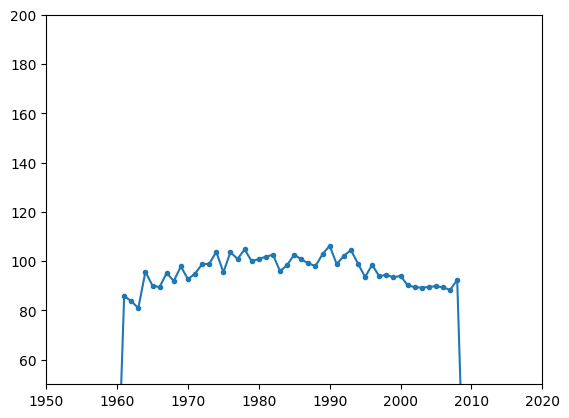

In [355]:
# Philippe fixed a problem with the FBCT (threshold adjustment)

B1_FBCT = pandas_index_localize(pd.read_pickle('/eos/project/l/lhc-lumimod/MD7003/Offline/8470/xsection_BCTF_B1.pkl'))
B2_FBCT = pandas_index_localize(pd.read_pickle('/eos/project/l/lhc-lumimod/MD7003/Offline/8470/xsection_BCTF_B2.pkl'))
B1_dBLM = pandas_index_localize(pd.read_pickle('/eos/project/l/lhc-lumimod/MD7003/Offline/8470/xsection_dBLM_B1.pkl'))
B2_dBLM = pandas_index_localize(pd.read_pickle('/eos/project/l/lhc-lumimod/MD7003/Offline/8470/xsection_dBLM_B2.pkl'))

plt.plot(B1_FBCT['sig_eff'].iloc[101]*1000,'.-')
plt.ylim(50,200)
plt.xlim(1950,2020)

Text(0, 0.5, '$\\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

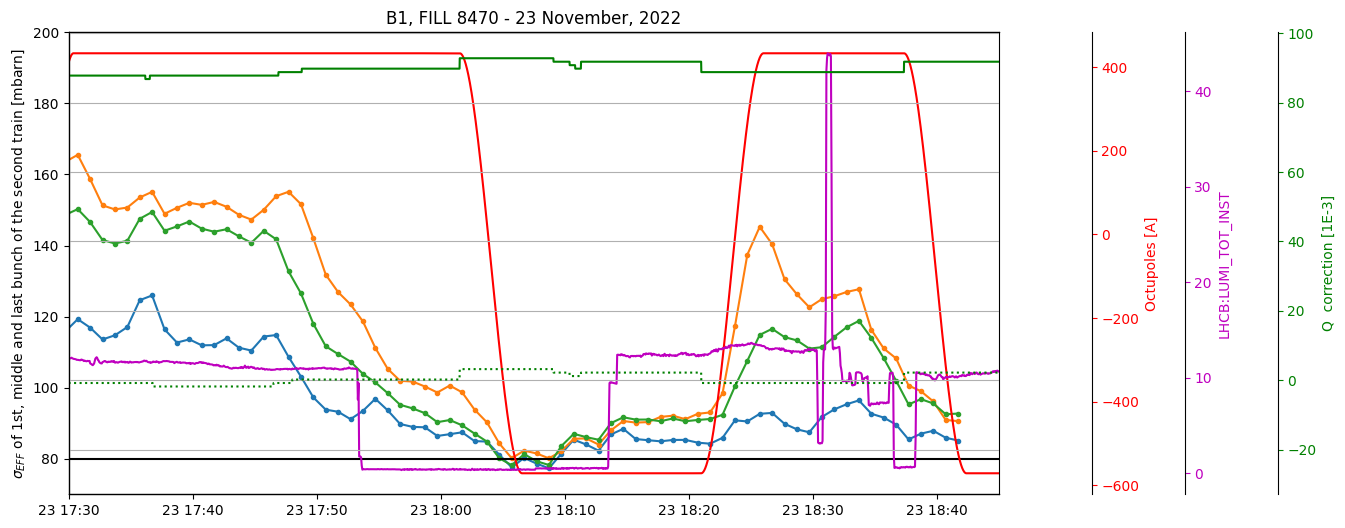

In [369]:
xlim_1 = pd.Timestamp('2022-11-23 17:30')
xlim_2 = pd.Timestamp('2022-11-23 18:45')
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

#10671,   19611,   28551
train_1 = [1067,1067+24-1,1067+48-1]
train_2 = [1961,1961+24-1,1961+48-1]
train_3 = [2855,2855+24-1,2855+48-1]

for bunches in train_2:
    plt.plot(B1_FBCT['sig_eff'].apply(lambda x:x[bunches])*1000,'.-')
plt.ylim(70,200)
plt.axhline(80, color='k')
plt.xlim(xlim_1,xlim_2)

# to plot octupoles
if True: 
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.1))
    ax_1.set_ylabel('Octupoles [A]')
    p, = ax_1.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'r')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.2))
    ax_1.set_ylabel('LHCB:LUMI_TOT_INST')
    p, = ax_1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())


if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.3))
    ax_1.set_ylabel('Q  correction [1E-3]')
    p, = ax_1.plot(my_df['LhcStateTracker:LHCBEAM1:QH_TRIM:value'].dropna()*1000, color='g')
    ax_1.plot(my_df['LhcStateTracker:LHCBEAM1:QV_TRIM:value'].dropna()*1000, 'g:')

    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

plt.grid(True)
plt.title(f'B1, FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
ax.set_ylabel('$\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

Text(0, 0.5, '$\\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

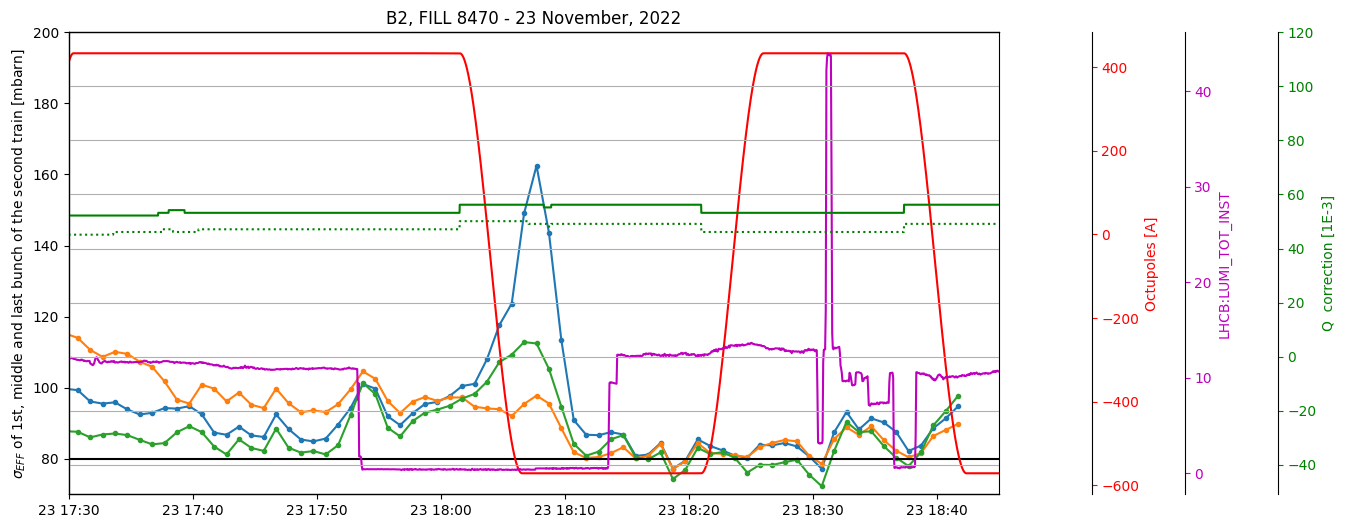

In [370]:
xlim_1 = pd.Timestamp('2022-11-23 17:30')
xlim_2 = pd.Timestamp('2022-11-23 18:45')
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

for bunches in train_2:
    plt.plot(B2_FBCT['sig_eff'].apply(lambda x:x[bunches])*1000,'.-')
plt.ylim(70,200)
plt.axhline(80, color='k')
plt.xlim(xlim_1,xlim_2)

# to plot octupoles
if True: 
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.1))
    ax_1.set_ylabel('Octupoles [A]')
    p, = ax_1.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'r')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.2))
    ax_1.set_ylabel('LHCB:LUMI_TOT_INST')
    p, = ax_1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())


if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.3))
    ax_1.set_ylabel('Q  correction [1E-3]')
    p, = ax_1.plot(my_df['LhcStateTracker:LHCBEAM2:QH_TRIM:value'].dropna()*1000, color='g')
    ax_1.plot(my_df['LhcStateTracker:LHCBEAM2:QV_TRIM:value'].dropna()*1000, 'g:')

    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

plt.grid(True)
plt.title(f'B2, FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
ax.set_ylabel('$\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

# dBLM

Text(0, 0.5, '$\\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

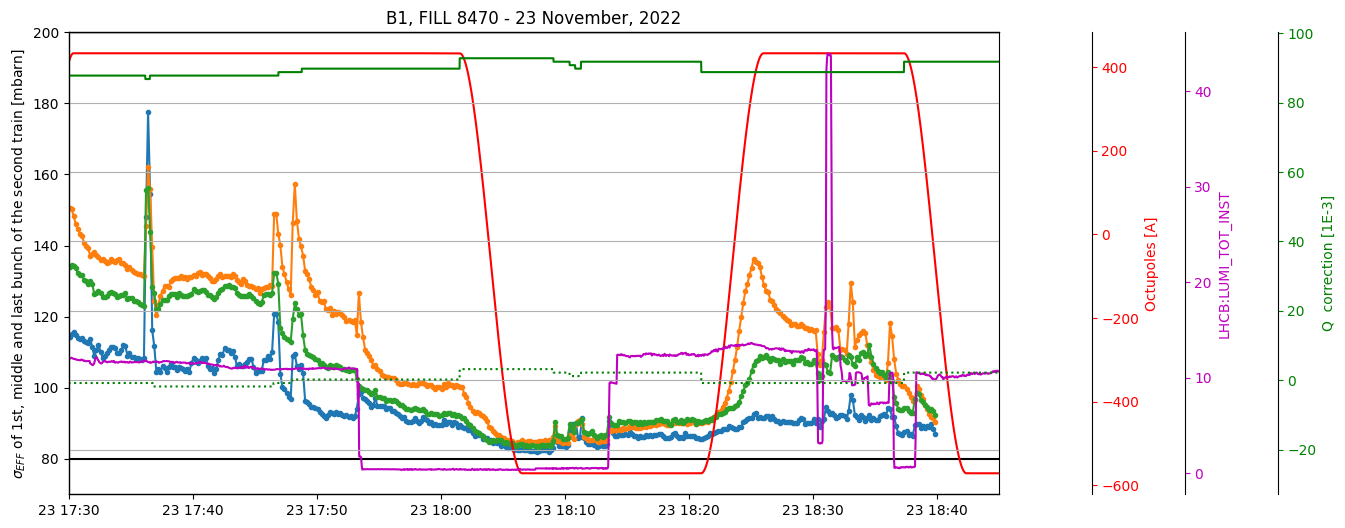

In [374]:
xlim_1 = pd.Timestamp('2022-11-23 17:30')
xlim_2 = pd.Timestamp('2022-11-23 18:45')
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

for bunches in train_2:
    plt.plot(B1_dBLM['sig_eff'].apply(lambda x:x[bunches])*1000,'.-')
plt.ylim(70,200)
plt.axhline(80, color='k')
plt.xlim(xlim_1,xlim_2)

# to plot octupoles
if True: 
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.1))
    ax_1.set_ylabel('Octupoles [A]')
    p, = ax_1.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'r')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.2))
    ax_1.set_ylabel('LHCB:LUMI_TOT_INST')
    p, = ax_1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())


if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.3))
    ax_1.set_ylabel('Q  correction [1E-3]')
    p, = ax_1.plot(my_df['LhcStateTracker:LHCBEAM1:QH_TRIM:value'].dropna()*1000, color='g')
    ax_1.plot(my_df['LhcStateTracker:LHCBEAM1:QV_TRIM:value'].dropna()*1000, 'g:')

    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

plt.grid(True)
plt.title(f'B1, FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
ax.set_ylabel('$\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

Text(0, 0.5, '$\\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')

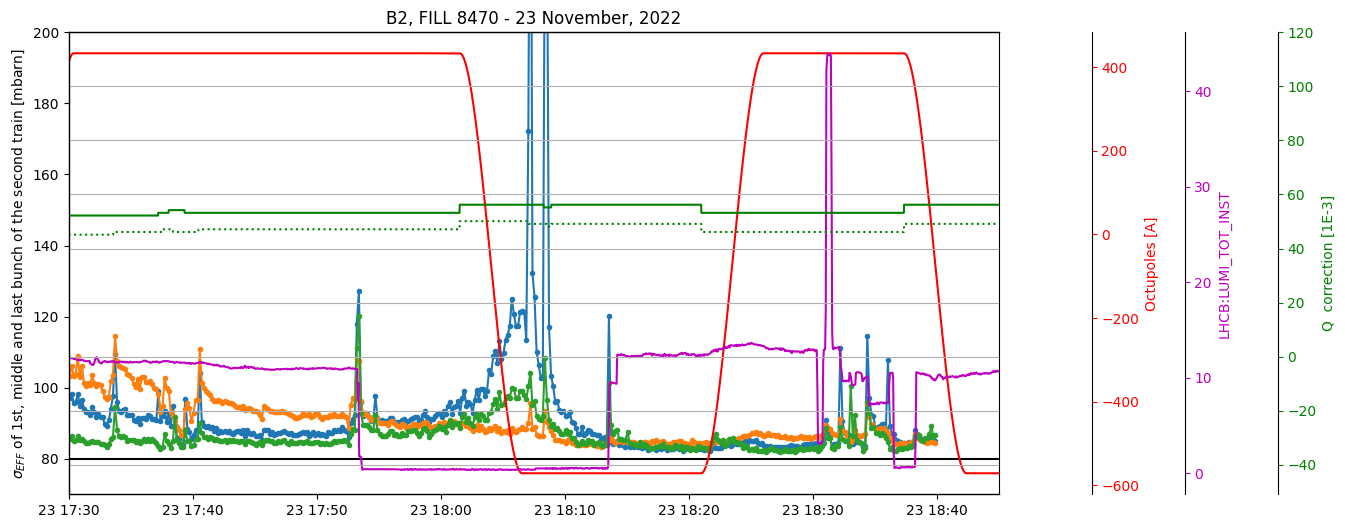

In [367]:
xlim_1 = pd.Timestamp('2022-11-23 17:30')
xlim_2 = pd.Timestamp('2022-11-23 18:45')
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

for bunches in train_2:
    plt.plot(B2_dBLM['sig_eff'].apply(lambda x:x[bunches])*1000,'.-')
plt.ylim(70,200)
plt.axhline(80, color='k')
plt.xlim(xlim_1,xlim_2)

# to plot octupoles
if True: 
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.1))
    ax_1.set_ylabel('Octupoles [A]')
    p, = ax_1.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'r')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.2))
    ax_1.set_ylabel('LHCB:LUMI_TOT_INST')
    p, = ax_1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())


if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.3))
    ax_1.set_ylabel('Q  correction [1E-3]')
    p, = ax_1.plot(my_df['LhcStateTracker:LHCBEAM2:QH_TRIM:value'].dropna()*1000, color='g')
    ax_1.plot(my_df['LhcStateTracker:LHCBEAM2:QV_TRIM:value'].dropna()*1000, 'g:')

    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

plt.grid(True)
plt.title(f'B2, FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
ax.set_ylabel('$\sigma_{EFF}$ of 1st, middle and last bunch of the second train [mbarn]')